## K-MEANS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

file_path = "online_gaming_behavior_dataset.csv"
df = pd.read_csv(file_path)

print(df.info())
print("Available Columns:", df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
from sklearn.calibration import LabelEncoder

# PRE - PROCESSING OF DATA

df = df.drop(columns=["PlayerID"], errors='ignore')

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# STANDARDIZE THE DATA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["PlayTimeHours", "AvgSessionDurationMinutes"]])  # CHOSEN FEATURES
df_scaled = pd.DataFrame(df_scaled, columns=["PlayTimeHours", "AvgSessionDurationMinutes"])


K-Means Silhouette Score: 0.3765
K-Means Davies-Bouldin Score: 0.8667

Cluster Summary with Assigned Labels:
         PlayTimeHours  AvgSessionDurationMinutes
Cluster                                          
1             5.486402                  65.065780
0            18.375457                  62.391823
2            12.245732                 146.203303


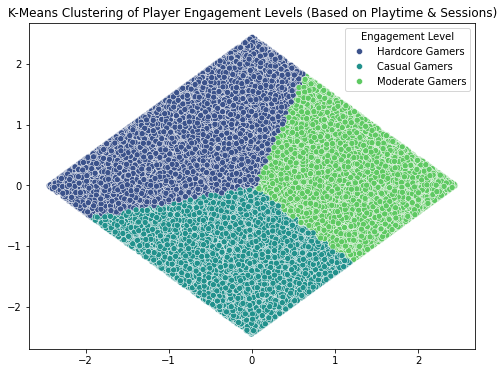

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


# APPLICATION OF K-MEANS CLUSTERING

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

kmeans_silhouette = silhouette_score(df_scaled, df["Cluster"])
kmeans_davies_bouldin = davies_bouldin_score(df_scaled, df["Cluster"])

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"K-Means Davies-Bouldin Score: {kmeans_davies_bouldin:.4f}")

cluster_summary = df.groupby("Cluster")[["PlayTimeHours", "AvgSessionDurationMinutes"]].mean()

cluster_summary["Total_Engagement"] = cluster_summary["PlayTimeHours"] + cluster_summary["AvgSessionDurationMinutes"]
cluster_summary = cluster_summary.sort_values(by="Total_Engagement", ascending=True)

cluster_labels = {
    cluster_summary.index[0]: "Casual Gamers",    # Lowest engagement
    cluster_summary.index[1]: "Moderate Gamers",  # Middle engagement
    cluster_summary.index[2]: "Hardcore Gamers"   # Highest engagement
}

df["Engagement Level"] = df["Cluster"].map(cluster_labels)

print("\nCluster Summary with Assigned Labels:")
print(cluster_summary.drop(columns=["Total_Engagement"]))

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df["Engagement Level"], palette="viridis")
plt.title("K-Means Clustering of Player Engagement Levels (Based on Playtime & Sessions)")
plt.show()


## DBSCAN

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

file_path = "online_gaming_behavior_dataset.csv"  
df = pd.read_csv(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# DATA PREPROCESSING

df = df.drop(columns=['PlayerID'])

categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()


,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,1.096023,0.819108,0.256009,1.412273,0.614176,-0.501334,1.376416,-0.602363,0.269487,1.026459,0.032814,0.931300
1,-0.297969,-1.220840,1.096511,1.412273,-0.939816,-0.501334,1.376416,-0.775865,1.004019,-1.352160,-1.006648,0.931300
2,-0.994965,-1.220840,1.096511,0.705766,-0.549654,-0.501334,-0.917744,1.132666,0.963212,-0.512647,1.141573,-1.474409
3,0.299456,0.819108,1.096511,-1.413756,-0.977506,1.994676,-0.917744,-0.081854,-0.199798,0.256906,1.557358,0.931300
4,0.100314,0.819108,-0.584492,-1.413756,0.507275,-0.501334,1.376416,-1.296374,0.738771,1.586134,0.864383,0.931300



Cluster Summary with Assigned Labels:
                PlayTimeHours  AvgSessionDurationMinutes
Cluster_DBSCAN                                          
0                   14.867621                  54.611111
1                    7.179682                  76.636364
3                    5.357969                 133.600000
4                    5.848174                 146.400000
2                    4.445575                 160.300000

DBSCAN Silhouette Score: 0.5565806244352465
DBSCAN Davies-Bouldin Score: 0.631994778313133


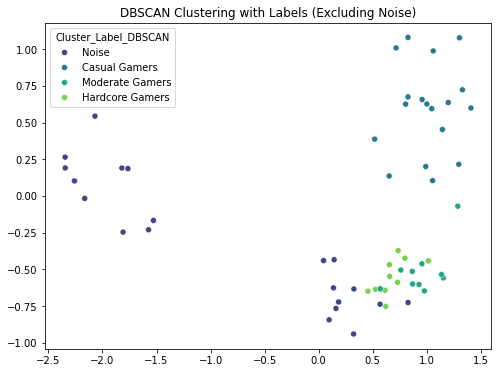

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# APPLICATION OF DBSCAN CLUSTERING

dbscan = DBSCAN(eps=1.06, min_samples=10)  
df_scaled["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)

valid_clusters = df_scaled[df_scaled["Cluster_DBSCAN"] != -1]

if not valid_clusters.empty:
    cluster_summary = df[df_scaled["Cluster_DBSCAN"] != -1].groupby(valid_clusters["Cluster_DBSCAN"])[["PlayTimeHours", "AvgSessionDurationMinutes"]].mean()

    cluster_summary["Rank"] = cluster_summary["PlayTimeHours"] + cluster_summary["AvgSessionDurationMinutes"]
    cluster_summary = cluster_summary.sort_values(by="Rank", ascending=True)

    cluster_labels_dbscan = {}
    cluster_labels_dbscan[cluster_summary.index[0]] = "Casual Gamers"
    cluster_labels_dbscan[cluster_summary.index[1]] = "Moderate Gamers"  
    cluster_labels_dbscan[cluster_summary.index[2]] = "Hardcore Gamers"

    df_scaled["Cluster_Label_DBSCAN"] = df_scaled["Cluster_DBSCAN"].map(cluster_labels_dbscan).fillna("Noise")

    print("\nCluster Summary with Assigned Labels:")
    print(cluster_summary.drop(columns=["Rank"]))  

if not valid_clusters.empty:
    silhouette_dbscan = silhouette_score(valid_clusters.drop(columns=['Cluster_DBSCAN', 'Cluster_Label_DBSCAN'], errors='ignore'), valid_clusters["Cluster_DBSCAN"])
    davies_bouldin_dbscan = davies_bouldin_score(valid_clusters.drop(columns=['Cluster_DBSCAN', 'Cluster_Label_DBSCAN'], errors='ignore'), valid_clusters["Cluster_DBSCAN"])
    
    print(f"\nDBSCAN Silhouette Score: {silhouette_dbscan}")
    print(f"DBSCAN Davies-Bouldin Score: {davies_bouldin_dbscan}")
else:
    print("DBSCAN failed to find enough clusters for evaluation.")

pca = PCA(n_components=2)

columns_to_drop = ['Cluster_DBSCAN', 'Cluster_Label_DBSCAN']
existing_columns = [col for col in columns_to_drop if col in df_scaled.columns]
pca_data_dbscan = pca.fit_transform(df_scaled.drop(columns=existing_columns))

plt.figure(figsize=(8, 6))
valid_indices = df_scaled["Cluster_DBSCAN"] != -1
sns.scatterplot(x=pca_data_dbscan[valid_indices, 0], y=pca_data_dbscan[valid_indices, 1], hue=df_scaled["Cluster_Label_DBSCAN"][valid_indices], palette="viridis")
plt.title("DBSCAN Clustering with Labels (Excluding Noise)")
plt.show()


## HIERARCHICAL

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist


file_path = "online_gaming_behavior_dataset.csv"  
df = pd.read_csv(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# DATA PREPROCESSING

df = df.drop(columns=['PlayerID'])

categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["PlayTimeHours", "AvgSessionDurationMinutes"]]) 
df_scaled = pd.DataFrame(df_scaled, columns=["PlayTimeHours", "AvgSessionDurationMinutes"])

df_scaled.head()


,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,1.096023,0.819108,0.256009,1.412273,0.614176,-0.501334,1.376416,-0.602363,0.269487,1.026459,0.032814,0.931300
1,-0.297969,-1.220840,1.096511,1.412273,-0.939816,-0.501334,1.376416,-0.775865,1.004019,-1.352160,-1.006648,0.931300
2,-0.994965,-1.220840,1.096511,0.705766,-0.549654,-0.501334,-0.917744,1.132666,0.963212,-0.512647,1.141573,-1.474409
3,0.299456,0.819108,1.096511,-1.413756,-0.977506,1.994676,-0.917744,-0.081854,-0.199798,0.256906,1.557358,0.931300
4,0.100314,0.819108,-0.584492,-1.413756,0.507275,-0.501334,1.376416,-1.296374,0.738771,1.586134,0.864383,0.931300



Hierarchical Clustering Summary with Assigned Labels:
                      PlayTimeHours  AvgSessionDurationMinutes
Cluster_Hierarchical                                          
1                         12.163576                  42.973222
2                          4.738098                 121.756555
3                         16.690009                 130.692463

Hierarchical Clustering Silhouette Score: 0.3410
Hierarchical Clustering Davies-Bouldin Score: 0.9165


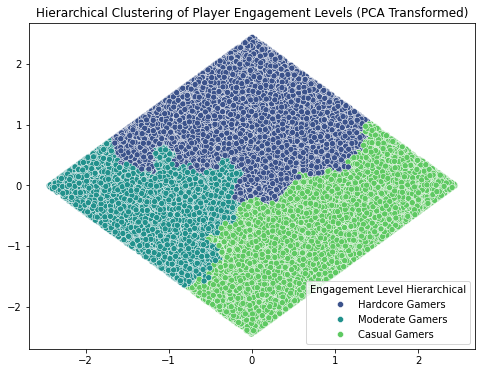

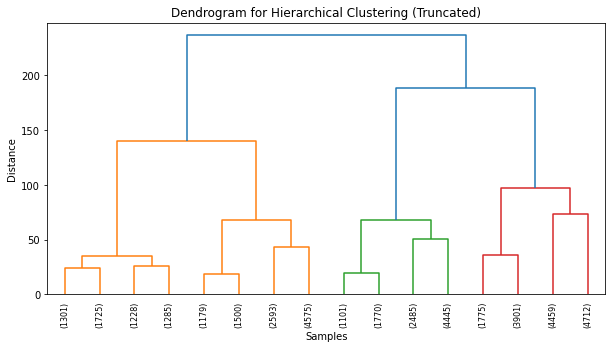

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler


linkage_matrix = linkage(df_scaled, method='ward')

df["Cluster_Hierarchical"] = fcluster(linkage_matrix, 3, criterion='maxclust')

cluster_summary = df.groupby("Cluster_Hierarchical")[["PlayTimeHours", "AvgSessionDurationMinutes"]].mean()

cluster_summary["Total_Engagement"] = cluster_summary["PlayTimeHours"] + cluster_summary["AvgSessionDurationMinutes"]
cluster_summary = cluster_summary.sort_values(by="Total_Engagement", ascending=True)

cluster_labels_hierarchical = {
    cluster_summary.index[0]: "Casual Gamers",    # Lowest engagement
    cluster_summary.index[1]: "Moderate Gamers",  # Middle engagement
    cluster_summary.index[2]: "Hardcore Gamers"   # Highest engagement
}

df["Engagement Level Hierarchical"] = df["Cluster_Hierarchical"].map(cluster_labels_hierarchical)

print("\nHierarchical Clustering Summary with Assigned Labels:")
print(cluster_summary.drop(columns=["Total_Engagement"]))

silhouette_hierarchical = silhouette_score(df_scaled, df["Cluster_Hierarchical"])
davies_bouldin_hierarchical = davies_bouldin_score(df_scaled, df["Cluster_Hierarchical"])

print(f"\nHierarchical Clustering Silhouette Score: {silhouette_hierarchical:.4f}")
print(f"Hierarchical Clustering Davies-Bouldin Score: {davies_bouldin_hierarchical:.4f}")

pca = PCA(n_components=2)
pca_data_hierarchical = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data_hierarchical[:, 0], y=pca_data_hierarchical[:, 1], hue=df["Engagement Level Hierarchical"], palette="viridis")
plt.title("Hierarchical Clustering of Player Engagement Levels (PCA Transformed)")
plt.show()

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8, truncate_mode="level", p=3)  # Truncate for readability
plt.title("Dendrogram for Hierarchical Clustering (Truncated)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
